In [49]:
import h5py
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
dataset_path = "/data/dust/group/ilc/sft-ml/datasets/sim-E1261AT600AP180-180/sim-E1261AT600AP180-180_file_*.slcio.hdf5"
all_dataset_files = sorted(glob.glob(dataset_path))
print(len(all_dataset_files))

90


19


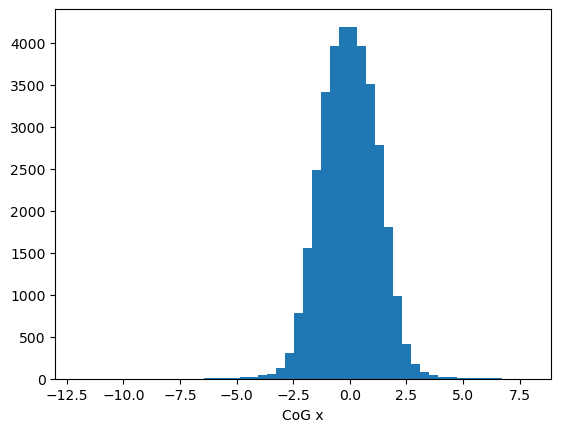

In [77]:
loaded = h5py.File(all_dataset_files[0], 'r')
n=100_000
events = loaded['events'][:n]
energy = events[:, 3]
mask = energy > 0
e_sum = np.sum(energy*mask, axis=1)
xs = events[:, 0]
ys = events[:, 1]
zs = events[:, 2]
cog_x = np.sum(xs*mask*energy, axis=1)/e_sum
plt.hist(cog_x, bins=50)
plt.xlabel("CoG x")
extreeme_idxs = np.where(np.abs(cog_x) > 6)[0]
print(len(extreeme_idxs))

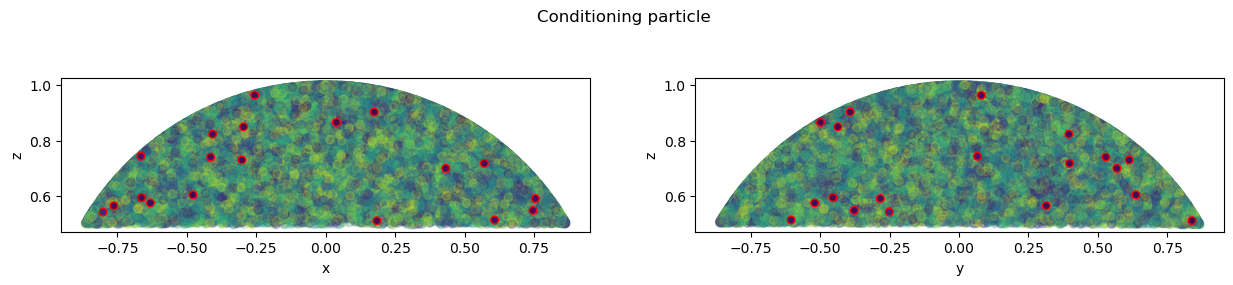

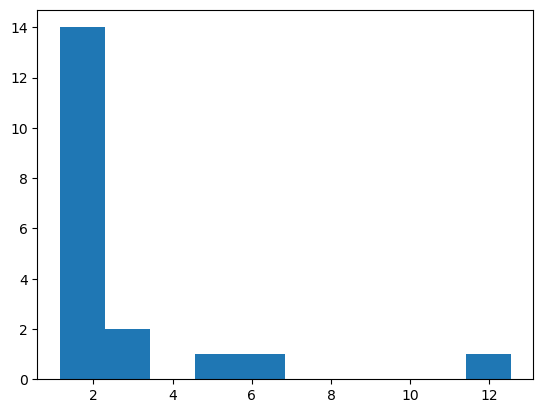

In [82]:
incident_energy = loaded['energy'][:n]
p_norm = loaded['p_norm_local'][:, :n]
fig, axarr = plt.subplots(1, 2, figsize=(15, 3))
fig.suptitle("Conditioning particle")
for i,ax in enumerate(axarr):
    ax.set_aspect('equal', adjustable='box')
    vmin=0
    vmax=np.max(incident_energy)
    ax.scatter(p_norm[i], p_norm[2], c=incident_energy, alpha=0.2, vmin=vmin, vmax=vmax)
    ax.set_xlabel("xy"[i])
    ax.set_ylabel("z")
    ax.scatter(p_norm[i][extreeme_idxs], p_norm[2][extreeme_idxs], edgecolor='red', c=incident_energy[extreeme_idxs], s=30, vmin=vmin, vmax=vmax)

plt.subplots()
plt.hist(incident_energy[extreeme_idxs])

order = np.argsort(-incident_energy[extreeme_idxs, 0])
extreeme_idxs = extreeme_idxs[order]

In [83]:
def display_event(i):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 2))
    fig.suptitle(f"Event {i}, incident energy={incident_energy[i]}")
    for a,ax in enumerate(axarr):
        energy = events[i][3]
        mask = energy>0
        cog = np.sum(energy*mask*events[i][a])/np.sum(energy)
        vmax = np.max(energy)
        points = ax.scatter(events[i][a][mask], events[i][2][mask], c=energy[mask], lw=0, alpha=0.2, vmin=0, vmax=vmax)
        ax.set_xlabel("xy"[a])
        ax.set_ylabel("z")
        mask = energy>0.001
        ax.scatter(events[i][a][mask], events[i][2][mask], c=energy[mask], vmin=0, vmax=vmax)
        ax.vlines(cog, 0, 30, color='red')

    

In [84]:

def hist_event(i):
    fig, axarr = plt.subplots(1, 2, figsize=(12, 2))
    fig.suptitle(f"Event {i}, incident energy={incident_energy[i]}")
    hist_against = [("x", xs[i]), ("z", zs[i])]
    kw_args = dict(density=True, bins=60, histtype='step')
    for a,ax in enumerate(axarr):
        max_on_ax = 0
        energy = events[i][3]
        mask = energy>0
        label, var = hist_against[a]
        n, _, _ = ax.hist(var[mask], weights=energy[mask], label="Energy", **kw_args)
        max_on_ax = max(np.max(n), max_on_ax)
        n, _, _ = ax.hist(var[mask], label="N-points", **kw_args)
        max_on_ax = max(np.max(n), max_on_ax)
        ax.set_xlabel(label)
        ax.set_ylabel("density")
        cog = np.sum(energy[mask]*var[mask])/np.sum(energy[mask])
        ax.vlines(cog, 0, max_on_ax*1.1, color='red')
    ax.legend()


27079
27691
11097
20489


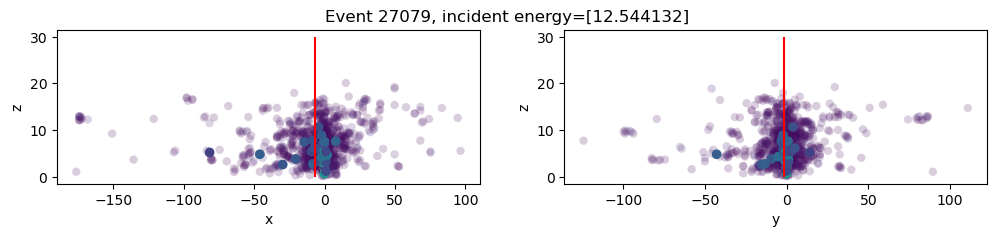

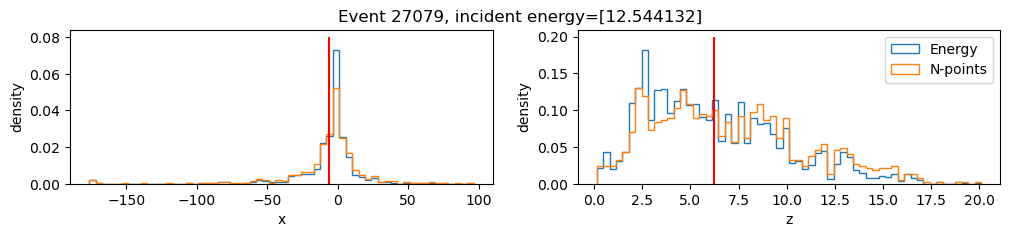

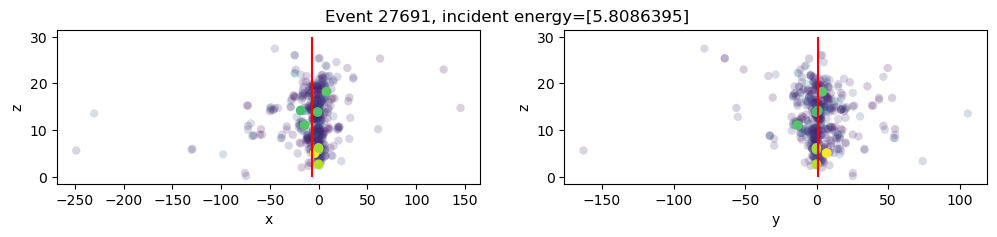

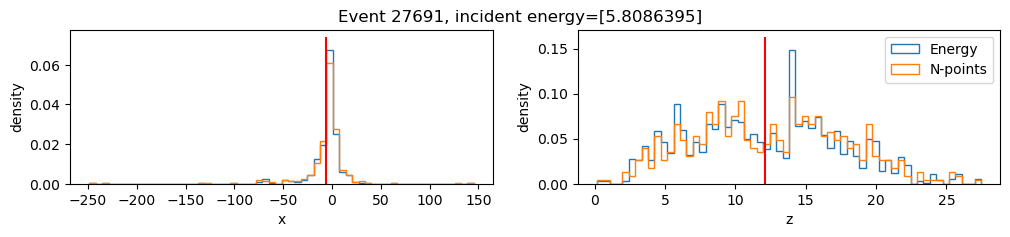

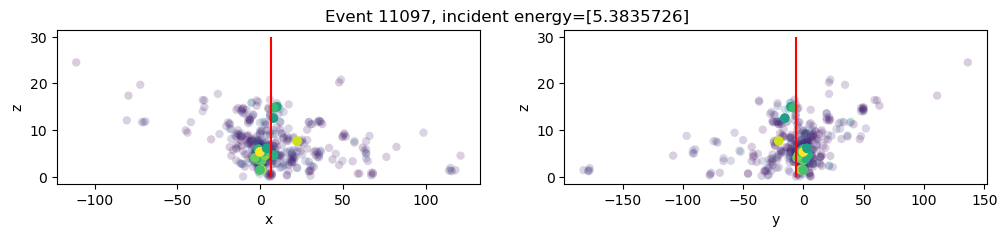

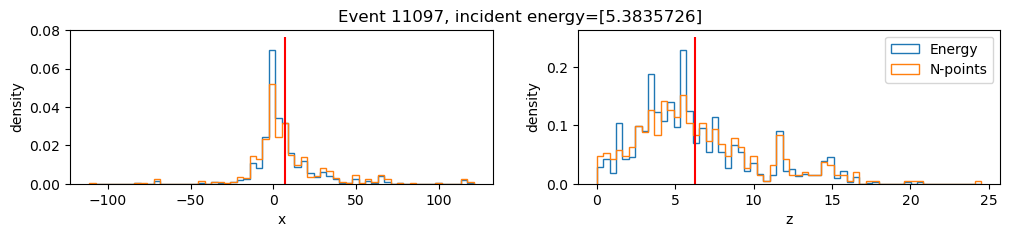

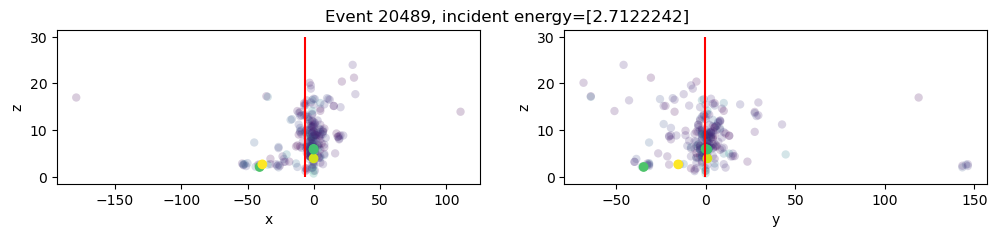

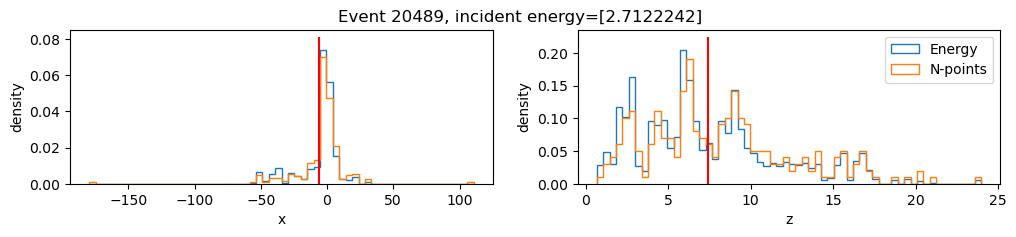

In [85]:
for i in extreeme_idxs[:4]:
    print(i)
    display_event(i)
    hist_event(i)

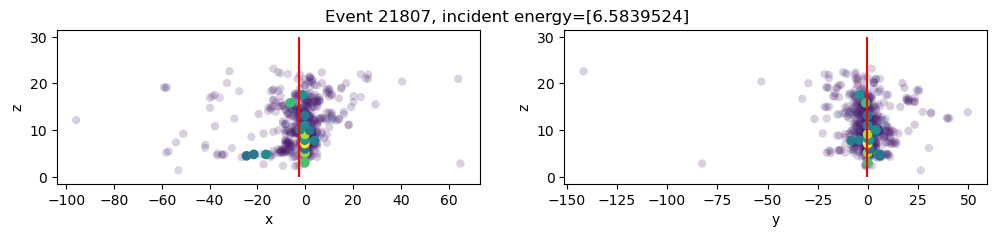

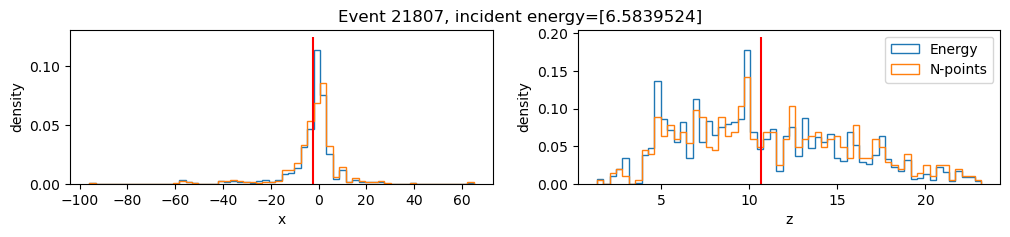

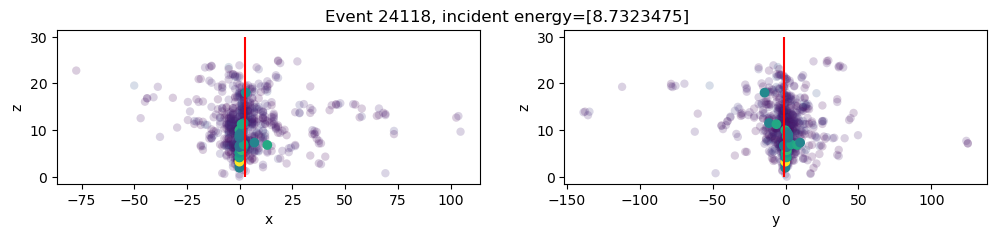

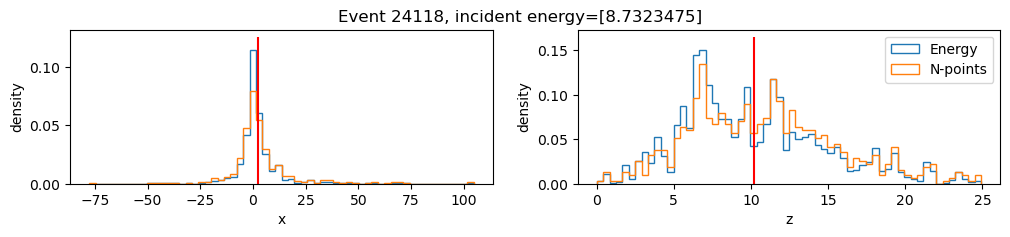

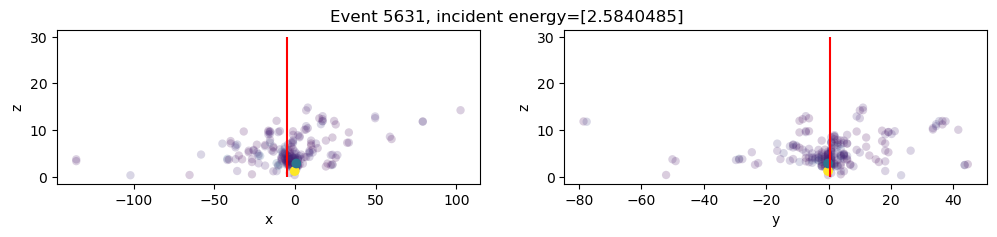

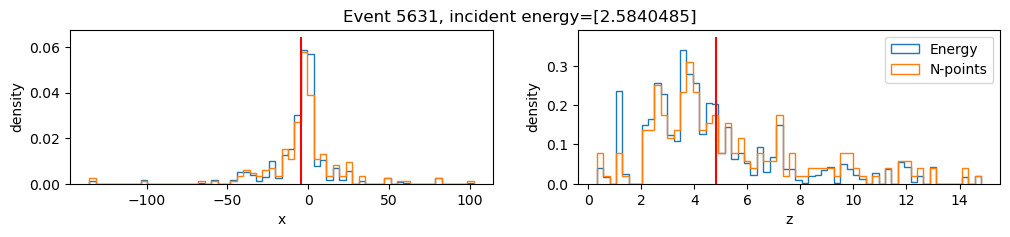

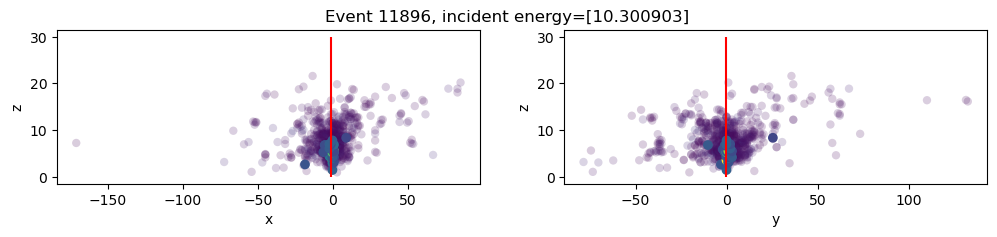

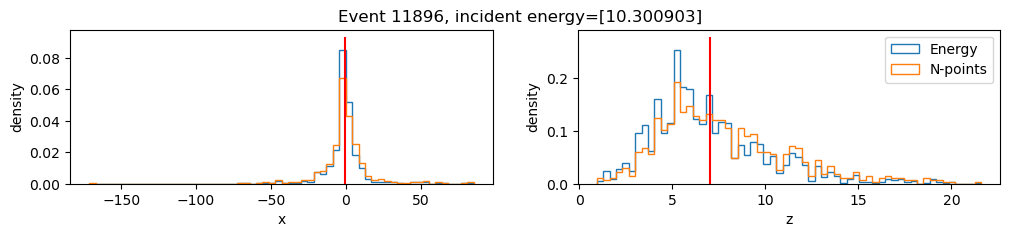

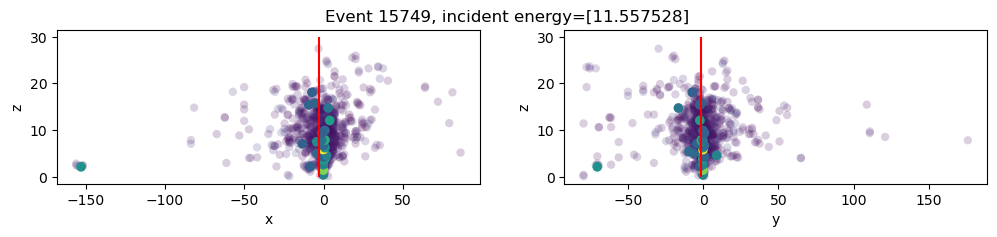

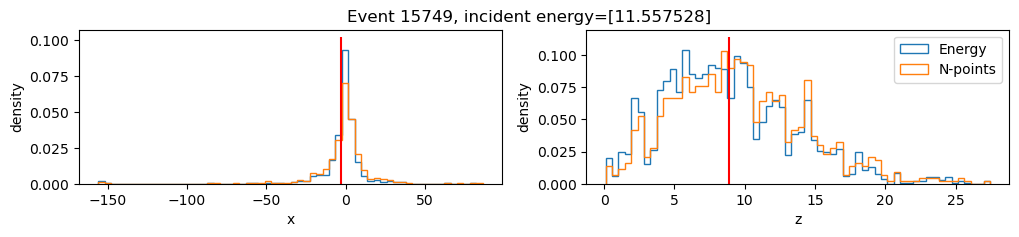

In [86]:
low_e = np.random.choice(np.where(incident_energy[:, 0] < 12)[0], size=5)
for i in low_e:
    display_event(i)
    hist_event(i)